In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime


In [47]:
dataset=pd.read_csv('energydata_complete.csv', parse_dates=['date'])

In [48]:
dataset['day_of_week'] = dataset['date'].dt.weekday_name
dataset['month'] = dataset['date'].dt.strftime('%b')
dataset['hour'] = dataset['date'].dt.hour
dataset['weekend'] = ((dataset['date'].dt.dayofweek) // 5 == 1).astype(float)

#To Calculate NSM
dataset['datenew'] = dataset['date'].dt.date
datenum=dataset['datenew'].unique()
lennsm = len(datenum)+1
print("len",lennsm)
data=[]
for j in range (1,lennsm):
    if (j==1):
        for i in range (0,42):
            if (i==0):
                a = 61200
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
    elif (j > 1 ):
        for i in range (0,144):
            if (i==0):
                a = 0
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
df1 = pd.DataFrame({'data_converted' : data})
dfc1 = df1[:len(dataset)]
dataset['NSM'] = dfc1

len 139


In [49]:
X=dataset.drop(['date','Appliances','datenew'], axis=1)
y=dataset[['Appliances']]

In [50]:
#Feature encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['day_of_week'] = le.fit_transform(X['day_of_week'])
X['month'] = le.fit_transform(X['month'])

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_day_of_week = onehotencoder.fit_transform(X.day_of_week.values.reshape(-1,1)).toarray()
X_month=onehotencoder.fit_transform(X.month.values.reshape(-1,1)).toarray()

day_of_week_onehot = pd.DataFrame(X_day_of_week, columns = ["day_of_week_"+str(int(i)) for i in range(X_day_of_week.shape[1])])
X = pd.concat([X, day_of_week_onehot], axis=1)

month_onehot = pd.DataFrame(X_month, columns = ["month_"+str(int(i)) for i in range(X_month.shape[1])])
X = pd.concat([X, month_onehot], axis=1)

X.drop(['day_of_week', 'month'], axis=1)


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "cate

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_0,month_1,month_2,month_3,month_4
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [52]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train)

y_test=sc_y.transform(y_test)



/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [53]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
# Predicting a new result
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:

#Score
#regressor.score(X_test, y_test)
print('Random Forest Regrssion  - Score - Training: %.4f' % regressor.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % regressor.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest R2: %.4f' % r2_score(y_test, y_pred))


#RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)


#MAE
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest Regrssion  - Score - Training: -0.0612
Random Forest Regression - Score - Testing: -0.0420
Random Forest R2: -0.0420
Random Forest RMSE: 0.1018
Mean Absolute Error: 0.08
Accuracy: -inf %.


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


In [55]:
# SVM using Variance feature selection


from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

y_test=sc_y.transform(y_test)


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
# Predicting a new result
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)

#Score
#regressor.score(X_test, y_test)
print('Random Forest Regrssion  - Score - Training: %.4f' % regressor.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % regressor.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest R2: %.4f' % r2_score(y_test, y_pred))


#RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)


#MAE
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')





/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with 

Random Forest Regrssion  - Score - Training: 0.3160
Random Forest Regression - Score - Testing: 0.2504
Random Forest R2: 0.2504
Random Forest RMSE: 0.9110
Mean Absolute Error: 0.38
Accuracy: 82.22 %.


In [56]:
y_pred

array([[ 0.52330909],
       [-0.63417613],
       [ 1.11197285],
       ..., 
       [-0.49447382],
       [ 0.17844627],
       [-0.03334546]])

In [57]:
# Random Forest without scaling

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)

#Score
#regressor.score(X_test, y_test)
print('Random Forest Regression - Score - Training: %.4f' % regressor.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % regressor.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest Regression R2: %.4f' % r2_score(y_test, y_pred))


#RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest Regression RMSE: %.4f' % forest_rmse)


#MAE
errors = abs(y_pred - y_test)
print('Mean Absolute Error (MAE):', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')





/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Regression - Score - Training: 0.9270
Random Forest Regression - Score - Testing: 0.5167
Random Forest Regression R2: 0.5167
Random Forest Regression RMSE: 0.7315
Mean Absolute Error (MAE): 0.35
Accuracy: 58.62 %.


In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train)

y_test=sc_y.transform(y_test)


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [59]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
# Predicting a new result
y_pred = regressor.predict(X_test)
y_pred=y_pred.reshape(-1,1)

Feature Importance:
               importance
NSM              0.165534
T3               0.053716
Press_mm_hg      0.044042
RH_3             0.043836
RH_5             0.040863
T8               0.034747
RH_4             0.034165
RH_2             0.032413
RH_out           0.030802
lights           0.030069
Tdewpoint        0.029008
RH_8             0.027890
RH_6             0.027746
RH_1             0.026894
T4               0.026723
T6               0.026621
RH_7             0.026105
T2               0.025486
RH_9             0.023874
Visibility       0.023187
T1               0.022989
T5               0.022828
T_out            0.021950
T7               0.021697
Windspeed        0.020606
T9               0.020384
rv2              0.018368
hour             0.018050
rv1              0.015655
day_of_week      0.014735
month_2          0.009224
month_4          0.004125
month            0.004062
day_of_week_2    0.001913
month_3          0.001661
day_of_week_1    0.001267
day_of_week_3    0

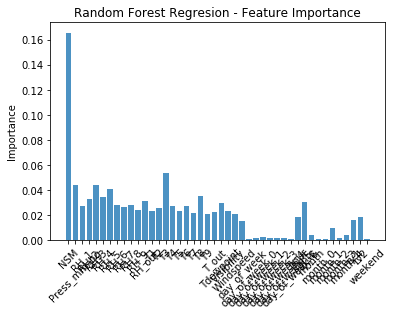

In [61]:
#Feature Importance
#print ('Features sorted by their score:')
#print (sorted(zip(map(lambda x: round(x, 4), regressor.feature_importances_), names), 
 #            reverse=True)
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print('Feature Importance:')
print(feature_importances)


plt.bar(feature_importances.index.values, feature_importances['importance'], align='center', alpha=0.8)
plt.ylabel('Importance')
plt.title('Faetures')
plt.xticks(rotation=45)
plt.title('Random Forest Regresion - Feature Importance')
plt.figure(figsize=(30,15))
plt.show()

In [62]:
#Score
#regressor.score(X_test, y_test)
print('Random Forest Regression - Score - Training: %.4f' % regressor.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % regressor.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest Regression R2: %.4f' % r2_score(y_test, y_pred))


#RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest Regression RMSE: %.4f' % forest_rmse)


#MAE
errors = abs(y_pred - y_test)
print('Mean Absolute Error (MAE):', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 



Random Forest Regression - Score - Training: 0.9261
Random Forest Regression - Score - Testing: 0.5081
Random Forest Regression R2: 0.5081
Random Forest Regression RMSE: 0.0700
Mean Absolute Error (MAE): 0.03
Accuracy: -inf %.
Mean Absolute Error (MAE): 0.0328828946153
Mean Squared Error (MSE): 0.00489447180558
Root Mean Squared Error (RMSE): 0.0699605017533


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


In [63]:
#Random Forest Regression Feature Selection - RFE

from sklearn.feature_selection import RFE
selector = RFE(regressor, step=1)
selector = selector.fit(X_train, y_train.ravel())

y_pred = selector.predict(X_test)
y_pred=y_pred.reshape(-1,1)



In [64]:
from sklearn import metrics

#Traning and Testing Score
print('Training and Testing accuracy:')
print('Random Forest Regrssion  - Score - Training: %.4f' % selector.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % selector.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest Regression R2: %.4f' % r2_score(y_test, y_pred))

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

selector.support_
selector.ranking_



Training and Testing accuracy:
Random Forest Regrssion  - Score - Training: 0.9263
Random Forest Regression - Score - Testing: 0.5036
Random Forest Regression R2: 0.5036
Mean Absolute Error (MAE): 0.0333398843082
Mean Squared Error (MSE): 0.00493941373562
Root Mean Squared Error (RMSE): 0.0702809628251


array([ 1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  2,  1,  1,
        1,  1,  1,  1,  1,  4,  6,  1,  1,  8,  7, 11,  9, 20,  1, 21, 14,
       13, 16, 19, 17, 18, 22, 23, 10, 12, 15])

In [37]:
#Hyper Parameter Tuning on RFR

from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection

param_grid1 = {'n_estimators' : [20, 40, 60],'random_state' : [0, 2]}
rf = RandomForestRegressor()
gs = GridSearchCV(rf, param_grid=param_grid1, cv = 3, n_jobs = -1, verbose=3, refit=True)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min remaining:    0.0s
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 40, 'random_state': 2}

In [65]:
regressor = RandomForestRegressor(n_estimators = 40, random_state = 2)
regressor.fit(X_train, y_train)
selector = RFE(regressor, step=1)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_pred = y_pred.reshape(-1,1)

#Score
#regressor.score(X_test, y_test)
print('Random Forest Regression - Score - Training: %.4f' % regressor.score(X_train, y_train))
print('Random Forest Regression - Score - Testing: %.4f' % regressor.score(X_test, y_test))

#R2Score
from sklearn.metrics import r2_score
print('Random Forest Regression R2: %.4f' % r2_score(y_test, y_pred))


#RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest Regression RMSE: %.4f' % forest_rmse)


#MAE
errors = abs(y_pred - y_test)
print('Mean Absolute Error (MAE):', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')






/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Regression - Score - Training: 0.9342
Random Forest Regression - Score - Testing: 0.5174
Random Forest Regression R2: 0.5054
Random Forest Regression RMSE: 0.0702
Mean Absolute Error (MAE): 0.03
Accuracy: -inf %.


/Users/srikantswamy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
